In [1]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/Users/jasper/Desktop/SIT764/output1.csv')

# Encode the binary target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['disorder'])

# Separate features (X) and target variable (y)
X = df.drop(['id', 'disorder','insomnia','slp_apnea'], axis=1)  
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [3]:
imputer = KNNImputer(n_neighbors=2)

# Impute NaN values in the DataFrame
X_scaled = imputer.fit_transform(X_scaled)

In [4]:
imputer = SimpleImputer(strategy='median')

# Impute NaN values in the DataFrame
y = y.reshape(-1, 1)
y = imputer.fit_transform(y)

In [5]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train, y_train = ros.fit_resample(X_scaled, y)

In [6]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

In [8]:
# Logistic Regression with tuned parameters
log_reg = LogisticRegression(C=0.1, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
report = classification_report(y_test, y_pred_log_reg)
print("Classification Report:")
print(report)

Logistic Regression Accuracy: 0.5816993464052288
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.66      0.59       355
         1.0       0.64      0.51      0.57       410

    accuracy                           0.58       765
   macro avg       0.59      0.59      0.58       765
weighted avg       0.59      0.58      0.58       765



In [9]:
# Support Vector Machine (SVM) with tuned parameters
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
report = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(report)

SVM Accuracy: 0.6928104575163399
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       355
         1.0       0.73      0.68      0.70       410

    accuracy                           0.69       765
   macro avg       0.69      0.69      0.69       765
weighted avg       0.70      0.69      0.69       765



In [10]:
# K-Nearest Neighbors (KNN) with tuned parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
report = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(report)

KNN Accuracy: 0.7973856209150327
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75       355
         1.0       0.75      0.93      0.83       410

    accuracy                           0.80       765
   macro avg       0.82      0.79      0.79       765
weighted avg       0.81      0.80      0.79       765



In [11]:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report)

Decision Tree Accuracy: 0.6836601307189543
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.56      0.62       355
         1.0       0.68      0.79      0.73       410

    accuracy                           0.68       765
   macro avg       0.69      0.68      0.68       765
weighted avg       0.69      0.68      0.68       765



In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9856209150326798
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       355
         1.0       0.98      1.00      0.99       410

    accuracy                           0.99       765
   macro avg       0.99      0.98      0.99       765
weighted avg       0.99      0.99      0.99       765



In [13]:
# Define parameters
params = {
    'objective': 'binary',  
    'metric': 'binary_error',  
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Create dataset for LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
# Train the model
num_round = 100
bst = lgb.train(params, lgb_train, num_round, valid_sets=[lgb_train, lgb_test])

# Make predictions
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_prob]  

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9150326797385621
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       355
         1.0       0.90      0.95      0.92       410

    accuracy                           0.92       765
   macro avg       0.92      0.91      0.91       765
weighted avg       0.92      0.92      0.91       765



In [14]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
242 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

Best Parameters: {'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9672903094680316
Accuracy: 0.984313725490196
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       355
         1.0       0.97      1.00      0.99       410

    accuracy                           0.98       765
   macro avg       0.99      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765



In [15]:
importances = best_rf_classifier.feature_importances_

X_train_original = ['gender1','nsrr_age','Latency start sleep to REM [min]','Arousal index','NoREM1%','NoREM2%', 'NoREM3%', 'REM%', 'sleep time','sleep latency','nsrr_bmi']
# Assuming you have stored the PCA object in a variable named 'pca'
# Assuming X_train_original contains the original feature data before PCA
# Get the explained variance ratio of each PCA component
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
# Map importances back to the original features
original_importances = np.zeros(len(X_train_original))
for i, component in enumerate(pca.components_):
    original_importances += importances[i] * np.abs(component) * explained_variance_ratio[i]
    

print("Original feature importances:")
for i, feature_name in enumerate(X_train_original):
    print(f"{feature_name}: {original_importances[i]}")

[0.268791   0.14295337 0.1264759 ]
Original feature importances:
gender1: 0.007021939466741275
nsrr_age: 0.004194310860015404
Latency start sleep to REM [min]: 0.009762322366688114
Arousal index: 0.004999906927500642
NoREM1%: 0.0045521492195893815
NoREM2%: 0.009970388510217981
NoREM3%: 0.008327180005897576
REM%: 0.00753229970224378
sleep time: 0.0052610170348827015
sleep latency: 0.00221698194925615
nsrr_bmi: 0.006974165425816994


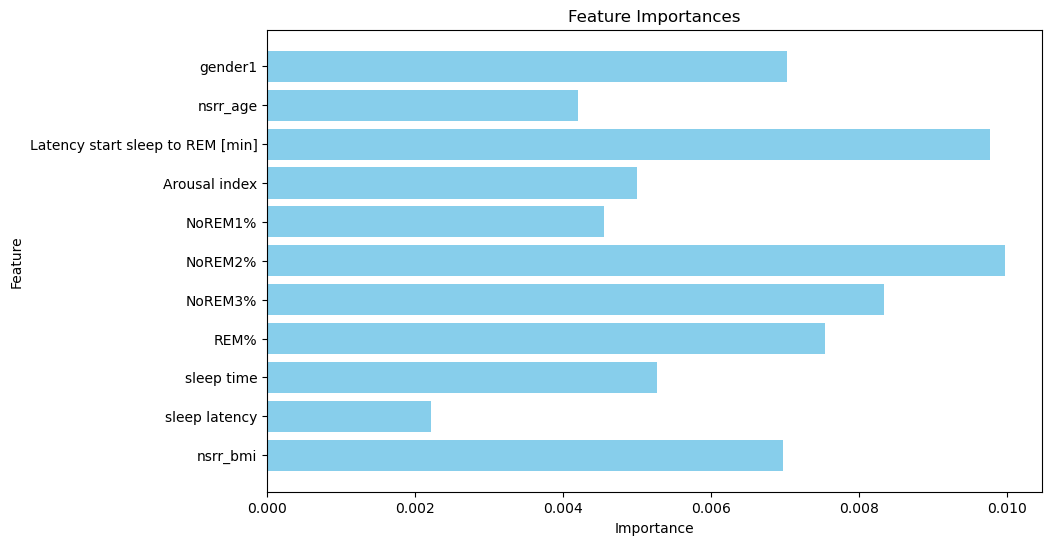

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_original,  original_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [17]:
import joblib
# Save the trained model to a file (using .pkl format)
model_filename = "random_forest_model.pkl"
joblib.dump(rf_classifier, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl
